In [34]:
# merge health data with collapsed measures....

# get zipcodes for each data file, see which one is the smallest and use that lol 

# for each file, get sbuset based on zipcodes 

# rename zipcode and year cols if necessary 

# merge based on those columns! ezzzzz....

In [35]:
# load libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import glob 
import os

In [36]:
# load all data 
parent_dir = os.path.join("..", "processed")
measures = pd.read_csv(os.path.join(parent_dir, "collapsed_measures", "LA_zipcode_measures_all_years.csv"))
er_rates = pd.read_csv(os.path.join(parent_dir, "health_data", "er_health_data_rates.csv"))
er_rates_all_zips = pd.read_csv(os.path.join(parent_dir, "health_data", "er_health_data_rates_all_zipcodes.csv"))
mortality = pd.read_csv(os.path.join(parent_dir, "health_data", "mortality_rates.csv"))

In [37]:
# load zipcode data 
zipcodes_shp = os.path.join("..", "processed", "collapsed_measures", "zipcodes_processed.shp") 
zipcodes = gpd.read_file(zipcodes_shp)
zipcodes["ZIPCODE"] = zipcodes["ZIPCODE"].astype("string").str[0:5]

<AxesSubplot:>

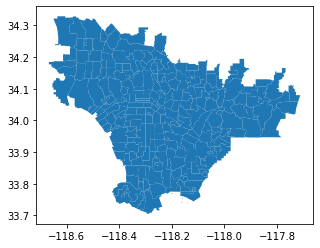

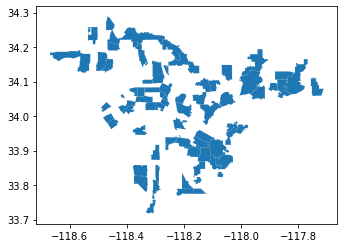

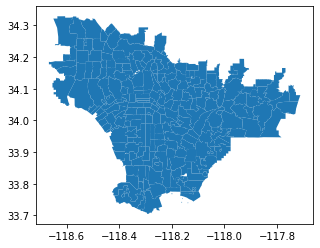

In [38]:
# compare zipcodes of each... 
measures_zips = measures["ZIPCODE"].astype("string")
measures_geo = zipcodes[zipcodes["ZIPCODE"].isin(measures_zips.to_list())]
measures_geo.plot(legend_kwds={"label": "Collapsed Measures Zipcodes"})

er_zips = er_rates["ZIPCODE"].astype("string")
er_geo = zipcodes[zipcodes["ZIPCODE"].isin(er_zips.to_list())]
er_geo.plot(legend_kwds={"label": "ER Rates Zipcodes"})

mortality_zips = mortality["Zipcode"].astype("string")
mortality_geo = zipcodes[zipcodes["ZIPCODE"].isin(mortality_zips.to_list())]
mortality_geo.plot(legend_kwds={"label": "Mortality Rates Zipcodes"})


In [39]:
# compare years / temporal coverage of each 
measures_yrs = measures.YEAR.unique()
er_yrs = er_rates.YEAR.unique()
mortality_yrs = mortality.Year.unique()

print(measures_yrs)
print(er_yrs)
print(mortality_yrs)

[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020]
[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020]
[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020]


In [40]:
# use zipcodes from er data
filtered_zips = er_zips

# use data from 2005-2020
years = range(2005, 2021)

In [41]:
# filter the other files using these zipcodes 
measures_filtered = measures.loc[(measures["ZIPCODE"].astype("string").isin(filtered_zips.to_list())) & (measures["YEAR"].isin(years))]
mortality_filtered = mortality.loc[mortality["Zipcode"].astype("string").isin(filtered_zips.to_list())]

print(measures.shape)
print(measures_filtered.shape)
print(mortality.shape)
print(mortality_filtered.shape)

(4626, 171)
(1168, 171)
(4000, 28)
(1168, 28)


In [54]:
# join all using years and zipcodes 
measures_filtered.reset_index(drop=True, inplace=True)
mortality_filtered.rename(columns={"Year":"YEAR", "Zipcode":"ZIPCODE"}, inplace=True)
mortality_filtered.reset_index(drop=True, inplace=True)

C:\Users\scarl\AppData\Local\Temp\ipykernel_23788\1478352676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_filtered.rename(columns={"Year":"YEAR", "Zipcode":"ZIPCODE"}, inplace=True)


In [56]:
print(er_rates.columns)
print(measures_filtered.columns)
print(mortality_filtered.columns)

Index(['YEAR', 'ZIPCODE', 'PerinatalDisorders', 'PregnancyBirthPuerperium',
       'CongenitalAnomalies', 'BloodBloodformingOrgans', 'Circulatory',
       'Digestive', 'Endocrine', 'Respiratory', 'NervousSensory',
       'Musculoskeletal', 'Neoplasms', 'Genitourinary', 'Infections',
       'InjuriesPoisoning', 'MentalIllness', 'Skin', 'Symptoms', 'Other',
       'Age_Under_1', 'Age_01_09', 'Age_10_19', 'Age_20_29', 'Age_30_39',
       'Age_40_49', 'Age_50_59', 'Age_60_69', 'Age_70_79', 'Age_80_and_Over',
       'EDvisits', 'geometry'],
      dtype='object')
Index(['YEAR', 'ZIPCODE', 'DAILY_AVG_TEMP_Inf_0', 'DAILY_AVG_TEMP_0_1',
       'DAILY_AVG_TEMP_1_2', 'DAILY_AVG_TEMP_2_3', 'DAILY_AVG_TEMP_3_4',
       'DAILY_AVG_TEMP_4_5', 'DAILY_AVG_TEMP_5_6', 'DAILY_AVG_TEMP_6_7',
       ...
       'DIURNAL_TEMP_RNG_32_33', 'DIURNAL_TEMP_RNG_33_34',
       'DIURNAL_TEMP_RNG_34_35', 'DIURNAL_TEMP_RNG_35_36',
       'DIURNAL_TEMP_RNG_36_37', 'DIURNAL_TEMP_RNG_37_38',
       'DIURNAL_TEMP_RNG_38_39

In [65]:
# rename cols 
er_subset = er_rates[er_rates.columns[2:(len(er_rates.columns) - 1)]]
er_subset = er_subset.add_prefix("ER_")
er_rates.rename(columns=dict(zip(er_rates.columns[2:(len(er_rates.columns) - 1)], er_subset.columns)), inplace=True)
print(er_rates.columns)

mortality_subset = mortality[mortality.columns[2:]]
mortality_subset = mortality_subset.add_prefix("M_")
mortality.rename(columns=dict(zip(mortality.columns[2:], mortality_subset.columns)), inplace=True)
print(mortality.columns)


Index(['YEAR', 'ZIPCODE', 'ER_ER_ER_PerinatalDisorders',
       'ER_ER_ER_PregnancyBirthPuerperium', 'ER_ER_ER_CongenitalAnomalies',
       'ER_ER_ER_BloodBloodformingOrgans', 'ER_ER_ER_Circulatory',
       'ER_ER_ER_Digestive', 'ER_ER_ER_Endocrine', 'ER_ER_ER_Respiratory',
       'ER_ER_ER_NervousSensory', 'ER_ER_ER_Musculoskeletal',
       'ER_ER_ER_Neoplasms', 'ER_ER_ER_Genitourinary', 'ER_ER_ER_Infections',
       'ER_ER_ER_InjuriesPoisoning', 'ER_ER_ER_MentalIllness', 'ER_ER_ER_Skin',
       'ER_ER_ER_Symptoms', 'ER_ER_ER_Other', 'ER_ER_ER_Age_Under_1',
       'ER_ER_ER_Age_01_09', 'ER_ER_ER_Age_10_19', 'ER_ER_ER_Age_20_29',
       'ER_ER_ER_Age_30_39', 'ER_ER_ER_Age_40_49', 'ER_ER_ER_Age_50_59',
       'ER_ER_ER_Age_60_69', 'ER_ER_ER_Age_70_79', 'ER_ER_ER_Age_80_and_Over',
       'ER_ER_ER_EDvisits', 'geometry'],
      dtype='object')
Index(['Year', 'Zipcode', 'M_Age_1_4', 'M_Age_15_24', 'M_Age_25_34',
       'M_Age_35_44', 'M_Age_45_54', 'M_Age_5_14', 'M_Age_55_64',
       'M_Ag

In [67]:
# merge!!
print(measures_filtered.index)
print(er_rates.index)
print(mortality_filtered.index)

RangeIndex(start=0, stop=1168, step=1)
RangeIndex(start=0, stop=937, step=1)
RangeIndex(start=0, stop=1168, step=1)


In [70]:
print(measures_filtered.shape)
print(er_rates.shape) # TODO add rows for missing zipcodes, for each yr...cuz the zipcodes for each yr varied!!!!
# and then, reset index (just for er rates, since ure only chanigng that one now), and then mergeeee

# OR, can download the er rates ver with na's for everything! and then can filter that one ezzzzz TODO TODO TODO
# # (jk not as easy...is prob smarter to do above way guh) 
print(mortality_filtered.shape)

(1168, 171)
(937, 32)
(1168, 28)


In [72]:
mortality_filtered

,YEAR,ZIPCODE,Age_1_4,Age_15_24,Age_25_34,Age_35_44,Age_45_54,Age_5_14,Age_55_64,Age_65_74,...,Cirrhosis,Respiratory,Diabetes,Heart,Hypertension,InfluenzaPneumonia,Suicide,Neoplasms,Nephrosis,Parkinsons
0,2005,90004,NaN,NaN,NaN,25.495895,57.790696,NaN,37.393980,76.487685,...,NaN,NaN,NaN,134.278381,NaN,NaN,NaN,118.980844,NaN,0.000000
1,2005,90007,0.0,NaN,NaN,NaN,46.336943,0.0,41.459370,53.653302,...,NaN,NaN,NaN,95.112672,NaN,NaN,NaN,63.408448,NaN,0.000000
2,2005,90015,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,58.699225,NaN,NaN,0.0,NaN,0.0,0.000000
3,2005,90017,NaN,NaN,NaN,NaN,48.688878,NaN,41.733324,83.466648,...,NaN,NaN,NaN,118.244418,NaN,NaN,NaN,62.599986,NaN,NaN
4,2005,90018,NaN,NaN,22.044972,26.053148,84.171710,0.0,78.159445,146.298449,...,NaN,34.069502,36.073590,238.486512,NaN,50.102209,NaN,170.347509,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,2020,91767,0.0,NaN,23.661639,35.492458,70.984916,NaN,141.969831,169.575076,...,NaN,NaN,29.577048,193.236715,27.605245,NaN,NaN,151.828847,NaN,NaN
1164,2020,91773,0.0,NaN,NaN,NaN,61.645042,NaN,137.967475,223.096342,...,NaN,64.580520,38.161216,278.870428,35.225738,NaN,NaN,196.677039,NaN,41.096695
1165,2020,91776,0.0,NaN,NaN,NaN,56.239957,0.0,104.445635,166.041778,...,NaN,48.205678,40.171398,168.719871,NaN,61.596144,NaN,182.110337,NaN,NaN
1166,2020,91790,NaN,NaN,NaN,35.670494,40.129306,0.0,82.488017,205.105339,...,NaN,31.211682,46.817523,240.775833,NaN,NaN,NaN,153.829005,NaN,NaN


In [68]:
print(er_rates.ZIPCODE.unique())

[90007 90015 90017 90019 90023 90027 90033 90034 90048 90057 90059 90241
 90247 90255 90262 90291 90301 90404 90502 90503 90505 90602 90605 90623
 90640 90650 90706 90710 90712 90716 90723 90732 90804 90806 91007 91105
 91204 91206 91208 91345 91352 91356 91367 91402 91403 91405 91436 91505
 91706 91723 91733 91740 91754 91767 91773 91776 91790 91801 90018 90067
 90701 90242 91010 90036 90004 90026 90292 90813 91325 90028 90232 90703
 91724]


In [69]:
print(measures_filtered.ZIPCODE.unique())

[90004 90007 90015 90017 90018 90019 90023 90026 90027 90028 90033 90034
 90036 90048 90057 90059 90067 90232 90241 90242 90247 90255 90262 90291
 90292 90301 90404 90502 90503 90505 90602 90605 90623 90640 90650 90701
 90703 90706 90710 90712 90716 90723 90732 90804 90806 90813 91007 91010
 91105 91204 91206 91208 91325 91345 91352 91356 91367 91402 91403 91405
 91436 91505 91706 91723 91724 91733 91740 91754 91767 91773 91776 91790
 91801]
